# Advanced Frequency Analysis of Smart Contract Risks

Welcome to this interactive tutorial on conducting advanced frequency analysis using Python in Google Colab!

## Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

## Before You Start
This notebook assumes you have some familiarity with basic programming concepts and a basic understanding of Python. If you are completely new to Python, I recommend reviewing Python basics before proceeding.

Let's get started by setting up our environment and loading the data!


### Step 1: Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

In [ ]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 28.2k/28.2k [00:00<00:00, 59.7MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [2]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data (1).xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,0e95242dceab8815a44767f6ef2b20a693765e56,https://hacken.io/research/,https://hacken.io/audits/sock/,Ethereum,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,I tagged centralized risk low and medium becau...
1,Data Analytics,8009b2e,https://hacken.io/research/,https://hacken.io/audits/sock/,Ethereum,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,I tagged centralized risk low and medium becau...
2,Data Analytics,7ef2853d21049986beefaec4f2405814319f7cfb,https://consensys.io/diligence/research/,https://consensys.io/diligence/audits/2023/12/...,Ethereum,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Bad contract and exploitation were tagged beca...
3,Data Analytics,CS-MKPSML-001,https://chainsecurity.com/blog/,https://chainsecurity.com/security-audit/maker...,Ethereum,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,"There's a fee for swapping tokens, so I marked..."
4,Data Analytics,8009b2e,https://hacken.io/research/,https://hacken.io/audits/sock/,Ethereum,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,I tagged centralized risk low and medium becau...


In [3]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                267 non-null    object
 1   Smart contract address                      267 non-null    object
 2   Blog post link                              267 non-null    object
 3   Audit website                               267 non-null    object
 4   Chain                                       267 non-null    object
 5   Is_closed_source                            267 non-null    bool  
 6   hidden_owner                                267 non-null    bool  
 7   anti_whale_modifiable                       267 non-null    bool  
 8   Is_anti_whale                               267 non-null    bool  
 9   Is_honeypot                                 267 non-null    bool  
 10  buy_tax                   

### Frequency Analysis

In [6]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['exploitation'].value_counts()

exploitation
False    186
True      81
Name: count, dtype: int64

Okay so we see that less than 50% of the dataset has FALSE for the column `exploitation`.

Now, let's define all the risk columns in our dataset so that we can then run the analysis on the same.

In [5]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [7]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

Is_closed_source                   15
hidden_owner                       31
anti_whale_modifiable              14
Is_anti_whale                      14
Is_honeypot                         7
buy_tax                            13
sell_tax                           11
slippage_modifiable                20
Is_blacklisted                      6
can_take_back_ownership            40
owner_change_balance               35
is_airdrop_scam                     7
selfdestruct                       12
trust_list                         34
is_whitelisted                     17
is_fake_token                      11
illegal_unicode                     5
exploitation                       81
bad_contract                       65
reusing_state_variable             16
encode_packed_collision             7
encode_packed_parameters           14
centralized_risk_medium            80
centralized_risk_high              44
centralized_risk_low               52
event_setter                       19
external_dep

Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-8-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


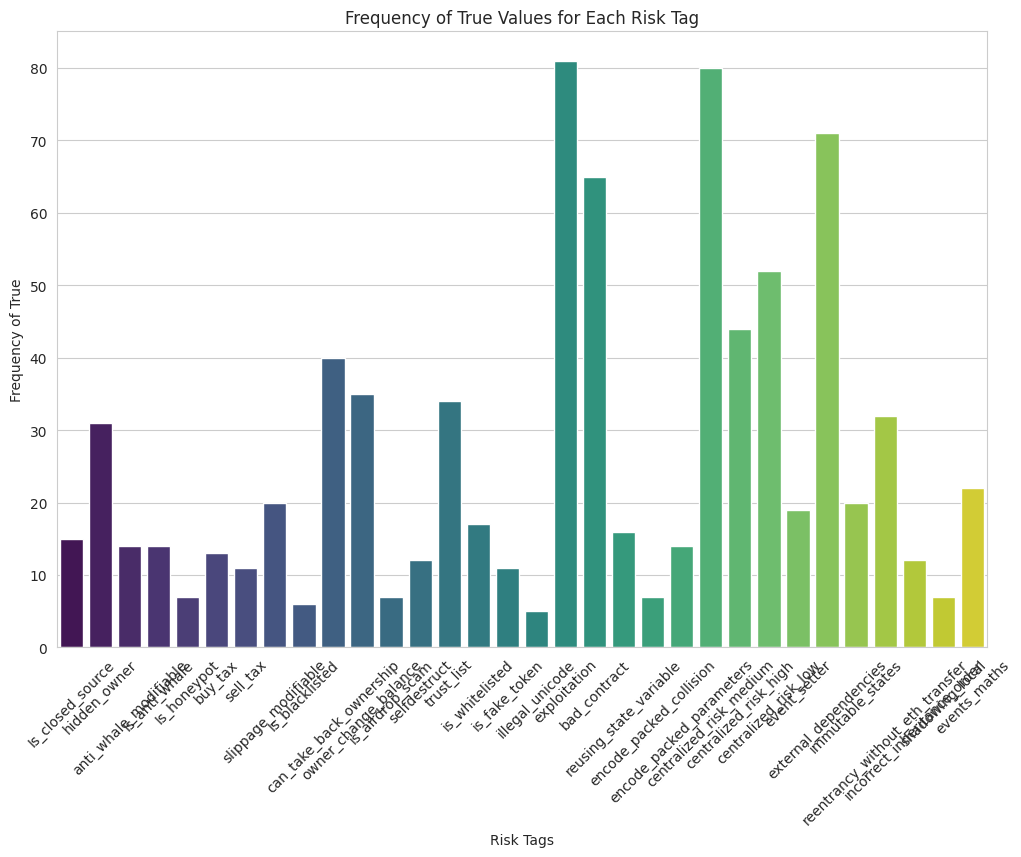

In [8]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()


**Again note that this is a dummy dataset. Your frequencies might be significantly lower than this with the real dataset.**

# Conclusion
Great job! You have successfully completed a frequency analysis of risk tags in smart contracts using Python. You've learned how to load data, perform calculations, and visualize the results using some of the most powerful libraries in Python.

## Next Steps
- Try modifying the charts or calculations to explore other aspects of the data.
- Consider analyzing the frequency of 'False' values or other specific conditions.
- Use this notebook as a template for analyzing other datasets.

Remember, the skills you've learned here are applicable to a wide range of data analysis tasks. Keep practicing and exploring!

Thank you for following along, and happy coding!


## Tips for Further Learning
- Explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for more advanced data manipulation techniques.
- Dive deeper into [matplotlib](https://matplotlib.org/stable/contents.html) and [seaborn](https://seaborn.pydata.org/) to discover more visualization styles and options.
- Participate in online forums and communities to enhance your learning and connect with other learners.
